# Data Analytics - Lab3 Sampling in Stan
Author: Piotr Roszkowski

In [90]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append('../')
import pystan
import stan_utility
import arviz as az
import scipy.stats as stats
import pandas as pd
import scipy.stats as stats

# Color for plot formating
black = "#000000"


## EXERCISE 1
##### Gamma distribution:
Gamma distribution is a two-parameter family of continuous probability distributions. It is the maximum entropy probability distribution.

In [25]:
# Show Stan file
with open('gamma_distr.stan', 'r') as file:
    print(file.read())

data {
  int a;
  int b;
}

generated quantities {
real X1 = gamma_rng(a,b);
real X2 = inv_gamma_rng(a,b);
}


I had problem with stan_utility.compile_model() function. All the time fail "StanModel' object has no attribute 'fit_class'" occurred. Google was unable to help me. Using directly pystan.StanModel() function solved the problem.

In [94]:
# Compile model
prior = pystan.StanModel(file = 'gamma_distr.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ecc04069803a21e1674f93ad1fc8f7e NOW.


In [103]:
my_data = {'a': 8, 'b': 12} # Defining alfa and beta

In [105]:
# Perform sampling
fit = prior.sampling(data=my_data,algorithm="Fixed_param", iter=1000, warmup=0, chains=1, refresh=1000,
                     seed=30042020)

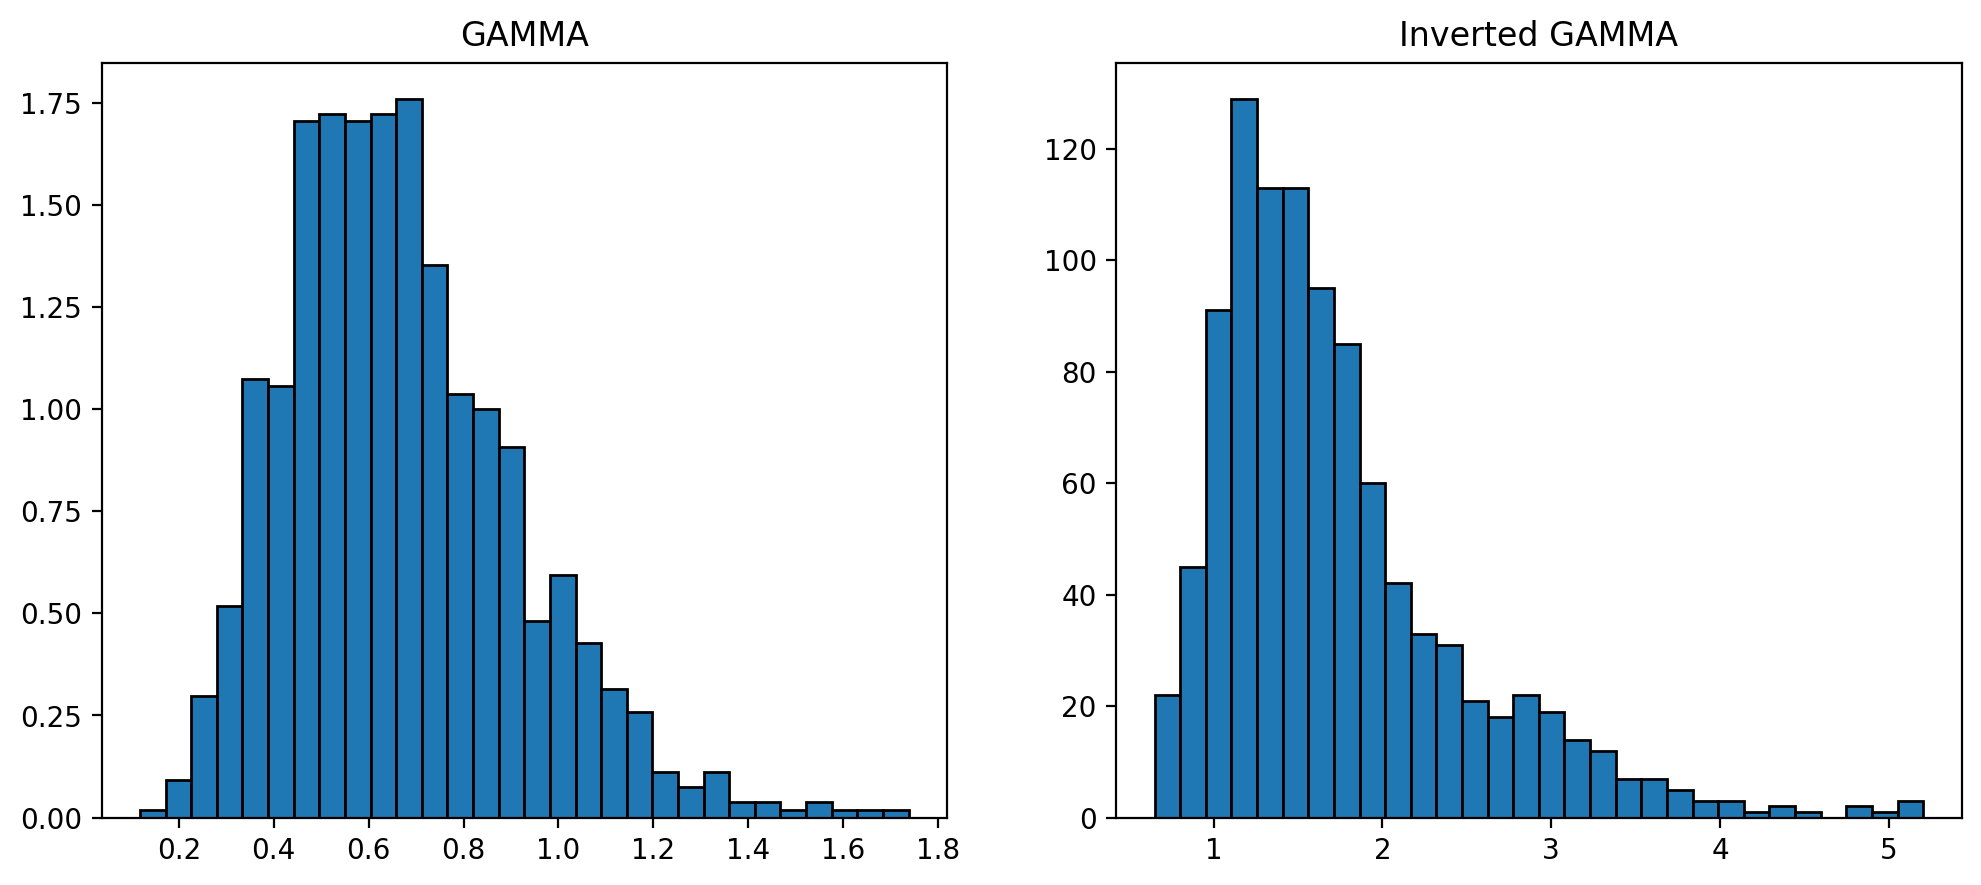

In [108]:
params = fit.extract()

X1 = params['X1']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1 = axes[0]
ax1.hist(X1, bins = 30, edgecolor = black)
x=np.linspace(0,7,500)
ax1.set_title('GAMMA')

X2 = params['X2']
ax2 = axes[1]
ax2.hist(X2, bins = 30, edgecolor = black)
ax2.set_title('Inverted GAMMA')

plt.show()

## EXERCISE 2
##### Negative binomial distribution:
Negative binomial distribution is a discrete probability distribution.

In [109]:
with open('binomial_distr.stan', 'r') as file:
    print(file.read())

data {
  real a;
  real m;
  real phi;
}

generated quantities {
  real neg_bin_con = neg_binomial_rng(a, a/m);
  real neg_bin_dis = neg_binomial_2_rng(m, phi);
  
  real poisson_con = poisson_rng(neg_bin_con);
  real poisson_dis = poisson_rng(neg_bin_dis);  
}



In [110]:
prior = pystan.StanModel(file = 'binomial_distr.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7e4090ca58eaf459b63620a29f76591f NOW.


In [111]:
alpha = 2
mean = 16
phi = 9
my_data = {'a':alpha, 'm':mean,'phi':phi}
fit = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

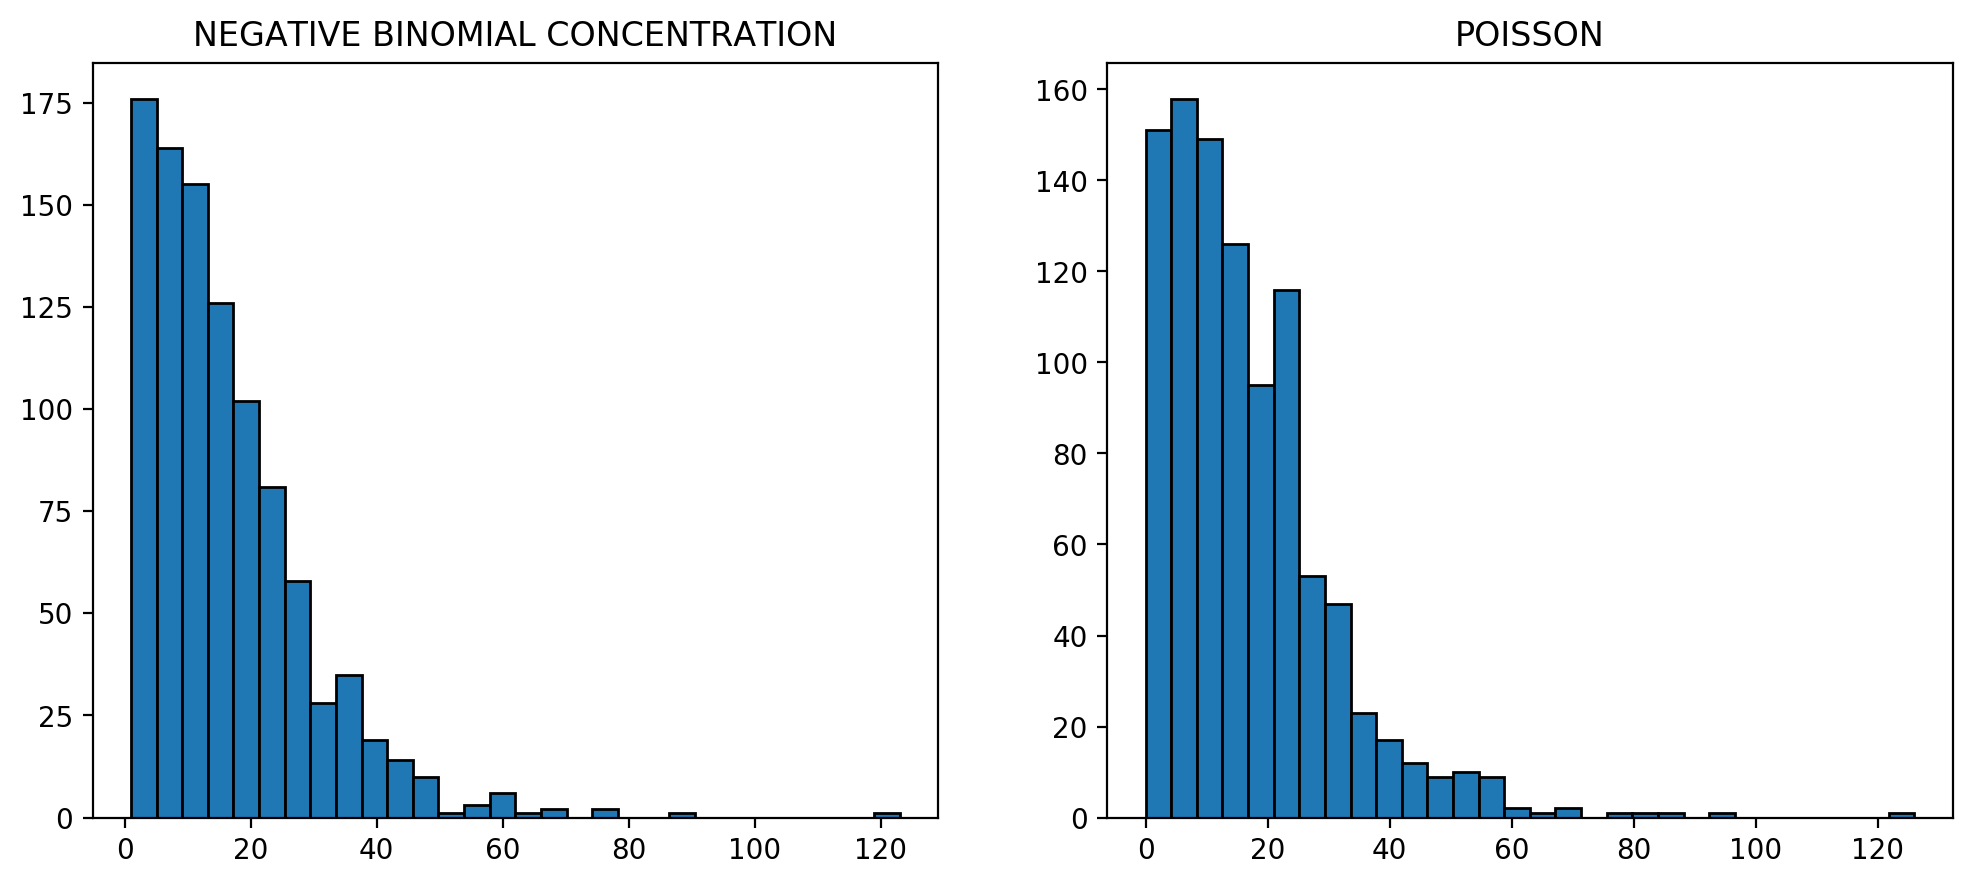

In [118]:
params = fit.extract()
neg_bin_con = params['neg_bin_con']
poisson_con = params['poisson_con']
neg_bin_dis = params['neg_bin_dis']
poisson_dis = params['poisson_dis']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1 = axes[0]
ax1.hist(neg_bin_con, bins = 30, edgecolor=black)
ax1.set_title('NEGATIVE BINOMIAL CONCENTRATION')

ax2 = axes[1]
ax2.hist(poisson_con, bins = 30, edgecolor=black)
ax2.set_title('POISSON')

plt.show()

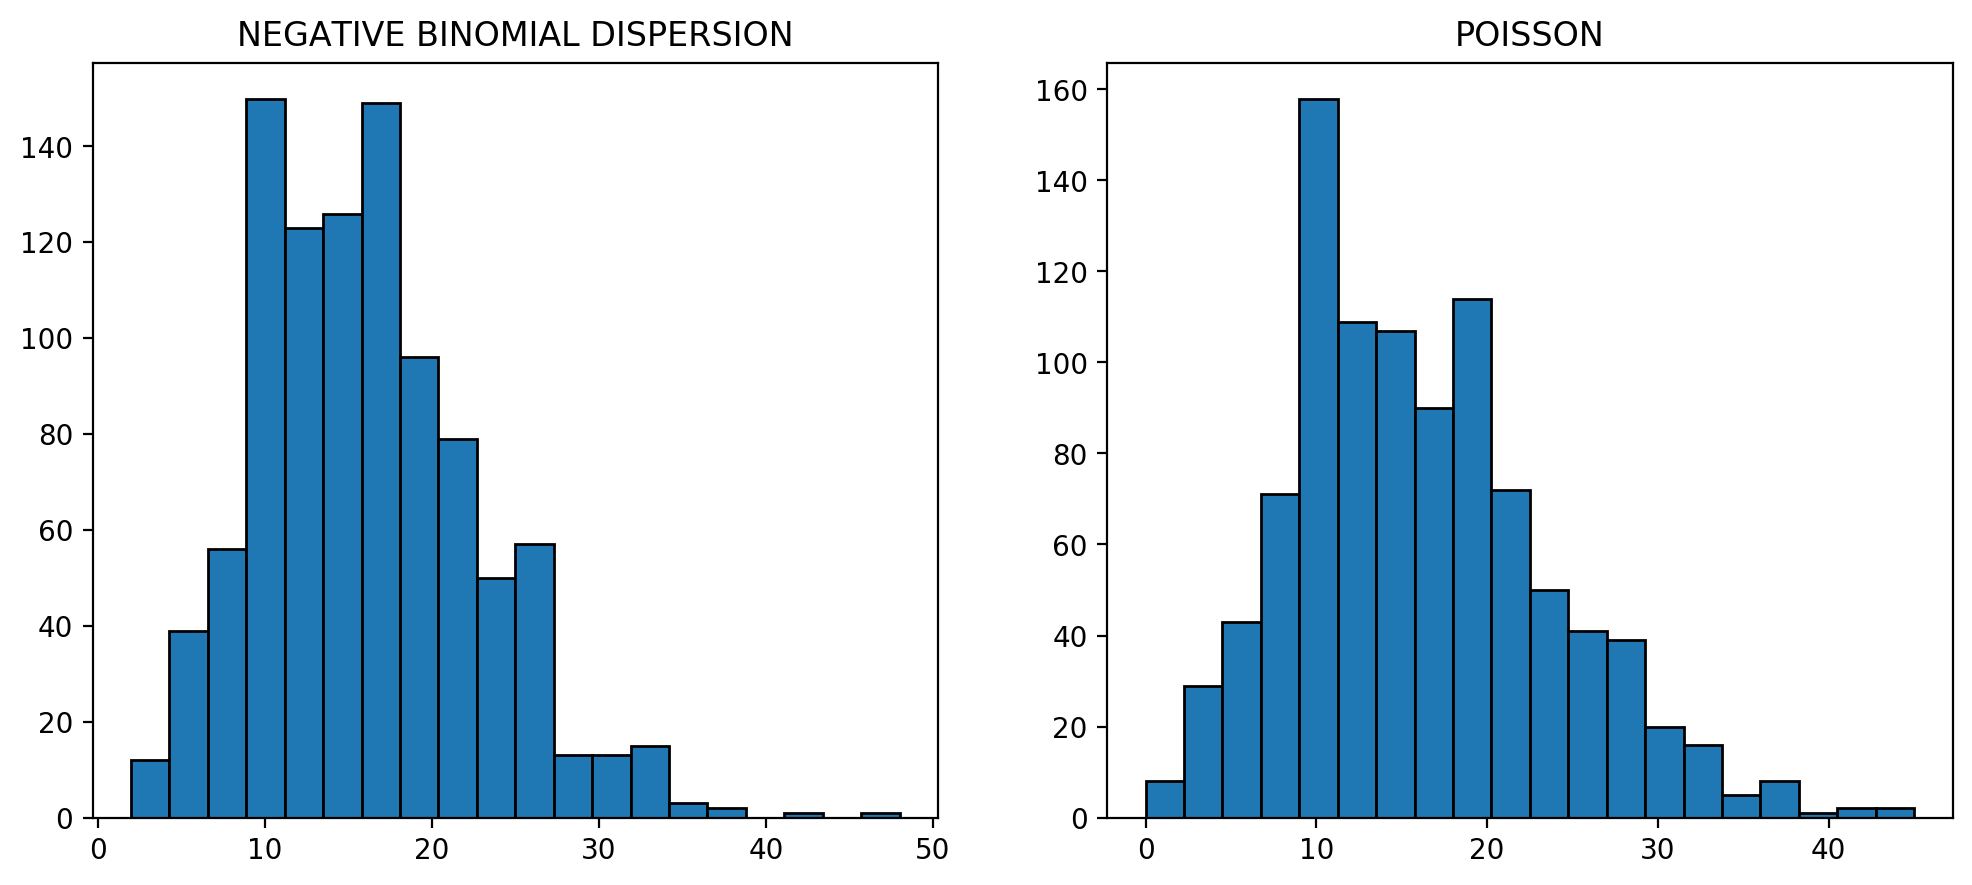

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax1 = axes[0]
ax1.hist(neg_bin_dis, bins = 20, edgecolor=black)
ax1.set_title('NEGATIVE BINOMIAL DISPERSION')

ax2 = axes[1]
ax2.hist(poisson_dis, bins = 20, edgecolor=black)
ax2.set_title('POISSON')

plt.show()

## EXERCISE 3
##### Student-t family distributions:
Student's t-distribution is any member of a family of continuous probability distributions that arises when estimating the mean of a normally distributed population.

In [175]:
with open('student_t_distr.stan', 'r') as file:
    print(file.read())

data {
  int n;
  real m;
  real sigma;
}

generated quantities {
    real T = student_t_rng(n, m, sigma);
    real C = cauchy_rng(m, sigma);
}



In [176]:
prior = pystan.StanModel(file = 'student_t_distr.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c5dfe8eb61d848eae0bb2653a28a20a NOW.


In [177]:
deg = 2
mean = 15
var = 1
my_data = {'n': deg, 'm': mean, 'sigma': var}

fit1 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

deg = 8
mean = 15
var = 1
my_data = {'n': deg, 'm': mean, 'sigma': var}

fit2 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

deg = 15
mean = 15
var = 1
my_data = {'n': deg, 'm': mean, 'sigma': var}

fit3 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

Text(0.5, 1.0, 'DEGREES = 15')

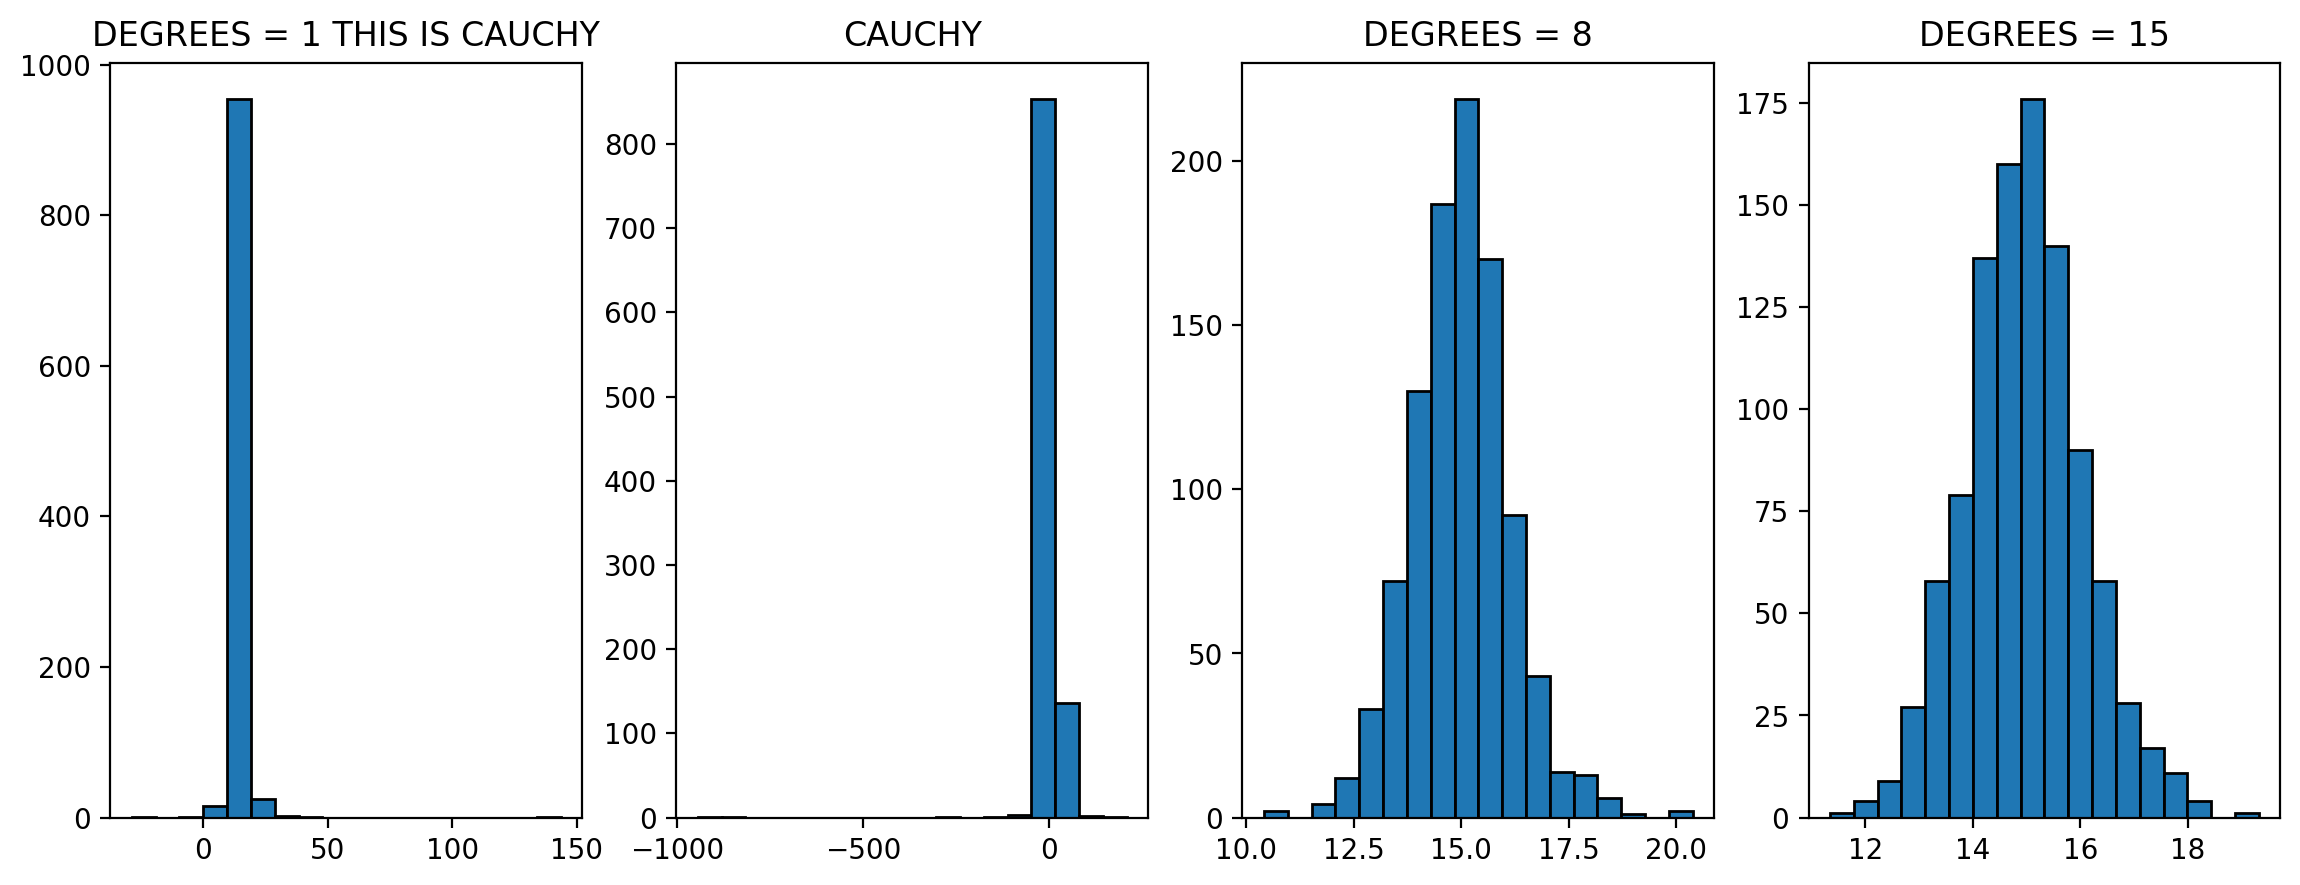

In [178]:
params1 = fit1.extract()
params2 = fit2.extract()
params3 = fit3.extract()

T = params1['T']
fig, axes = plt.subplots(1, 4, figsize=(14, 5))
ax1 = axes[0]
ax1.hist(T, bins = 18, edgecolor = black)
ax1.set_title('DEGREES = 1 THIS IS CAUCHY')

CAUCHY = params1['C']
ax2 = axes[1]
ax2.hist(CAUCHY, bins = 18, edgecolor = black)
ax2.set_title('CAUCHY')

T = params2['T']
ax3 = axes[2]
ax3.hist(T, bins = 18, edgecolor = black)
ax3.set_title('DEGREES = 8')

T = params3['T']
ax4 = axes[3]
ax4.hist(T, bins = 18, edgecolor = black)
ax4.set_title('DEGREES = 15')


## EXERCISE 4
##### Multivariate normal distribution:
The multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions.

In [133]:
with open('multivariate_distr.stan', 'r') as file:
    print(file.read())

data {
  int n;
  vector[n] mu;
  matrix[n,n] sigma;
}

generated quantities {
    vector[n] multi = multi_normal_rng(mu, sigma);
}



In [134]:
prior = pystan.StanModel(file = 'multivariate_distr.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e64c495776fb22dc1f33130a1eef9316 NOW.


In [135]:
# Sampling in 2 dimensions
n = 2
m = [2, 8]
sigma = [[1. , 0.3],[0.3, 4]]
my_data = {'n': n, 'mu': m, 'sigma': sigma}

fit1 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

# Sampling in 3 dimensions
n = 3
m = [1,2,15]
sigma = [[1. , 0.6, 0.6],[0.6, 4. , 0.6],[0.6, 0.6, 9.]]
my_data = {'n': n, 'mu': m, 'sigma': sigma}

fit2 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

# Sampling in 4 dimensions
n = 4
m = [1,2,15,20]
sigma = [[2. , 0.6, 0.6, 0.6],[0.6, 4. , 0.6, 0.6],[0.6, 0.6, 5., 0.6],[0.6, 0.6, 0.6, 5]]
my_data = {'n': n, 'mu': m, 'sigma': sigma}

fit3 = prior.sampling(data = my_data, algorithm = "Fixed_param", iter = 1000, warmup = 0, chains = 1, refresh=1000,
                     seed=29042020)

#### 2 DIMENSIONS:

Text(0, 0.5, 'normal2')

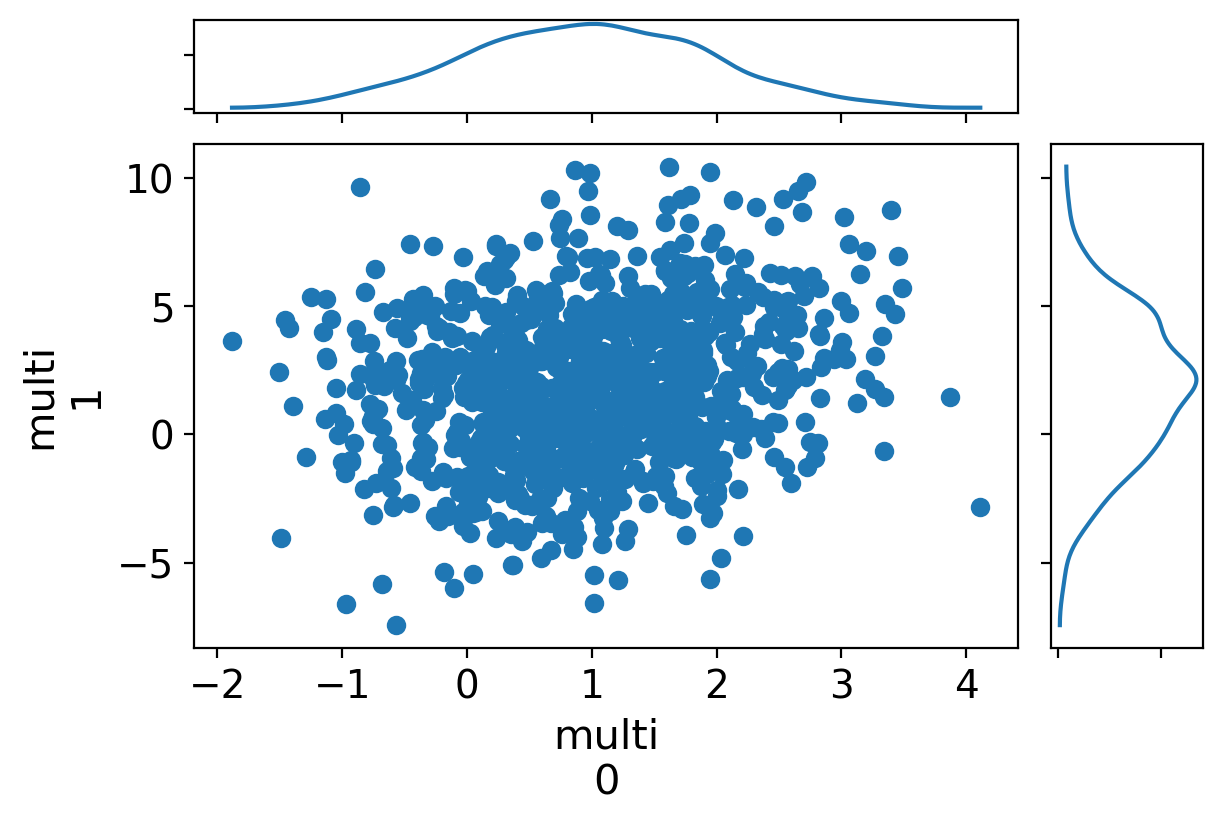

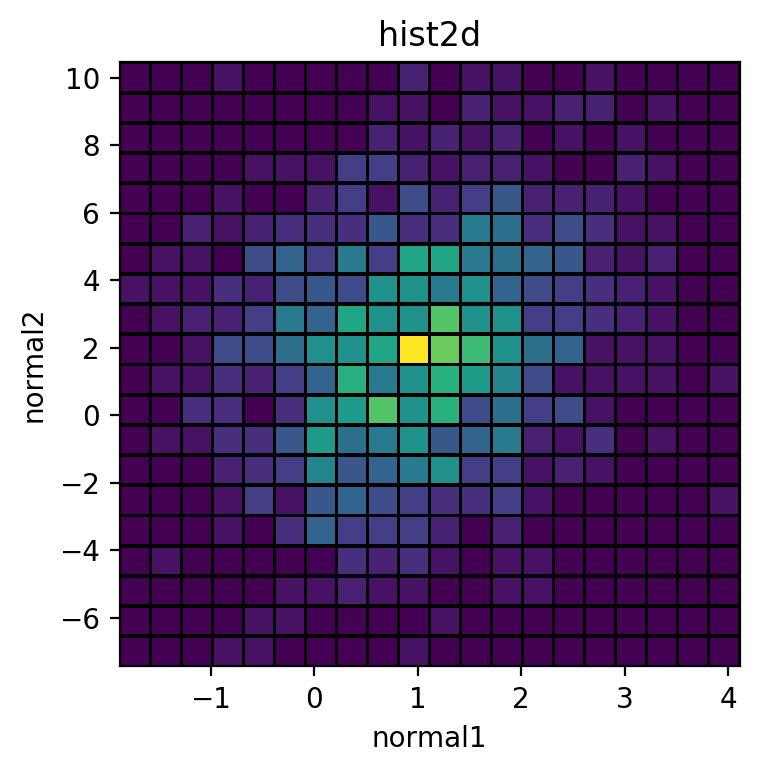

In [147]:
params = fit1.extract()
result = params['multi']
result1 = [result[i][0] for i in range(0,1000)]
result2 = [result[i][1] for i in range(0,1000)]
az.plot_joint(fit1)

fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.hist2d(result1,result2,bins=20,color=dark,edgecolor=dark_highlight, density=True)
axes.set_title(r'hist2d')
plt.xlabel('normal1')
plt.ylabel('normal2')

#### 3 Dimensions:

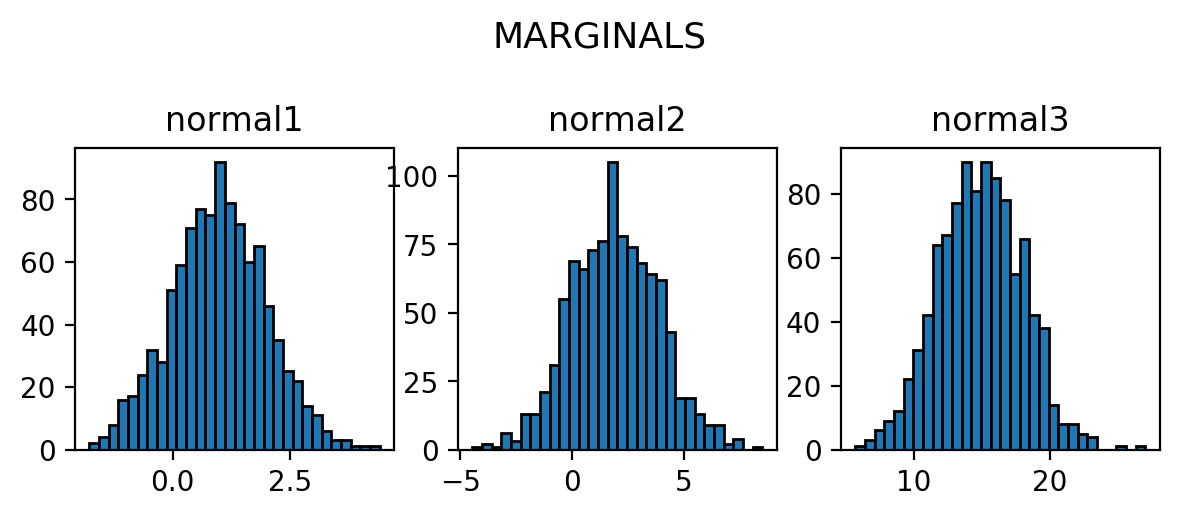

In [165]:
params = fit2.extract()
result = params['multi']
result1 = [result[i][0] for i in range(0,1000)]
result2 = [result[i][1] for i in range(0,1000)]
result3 = [result[i][2] for i in range(0,1000)]
fig, axes = plt.subplots(1, 3, figsize=(7, 2))
fig.suptitle('MARGINALS', x= 0.5, y=1.2, fontsize=13)
ax1=axes[0]
ax1.hist(result1, bins = 30, edgecolor = black)
ax1.set_title(r'normal1')
ax2=axes[1]
ax2.hist(result2, bins = 30, edgecolor = black)
ax2.set_title(r'normal2')
ax3=axes[2]
ax3.hist(result3, bins = 30, edgecolor = black)
ax3.set_title(r'normal3')
plt.show()


#### 4 Dimensions:

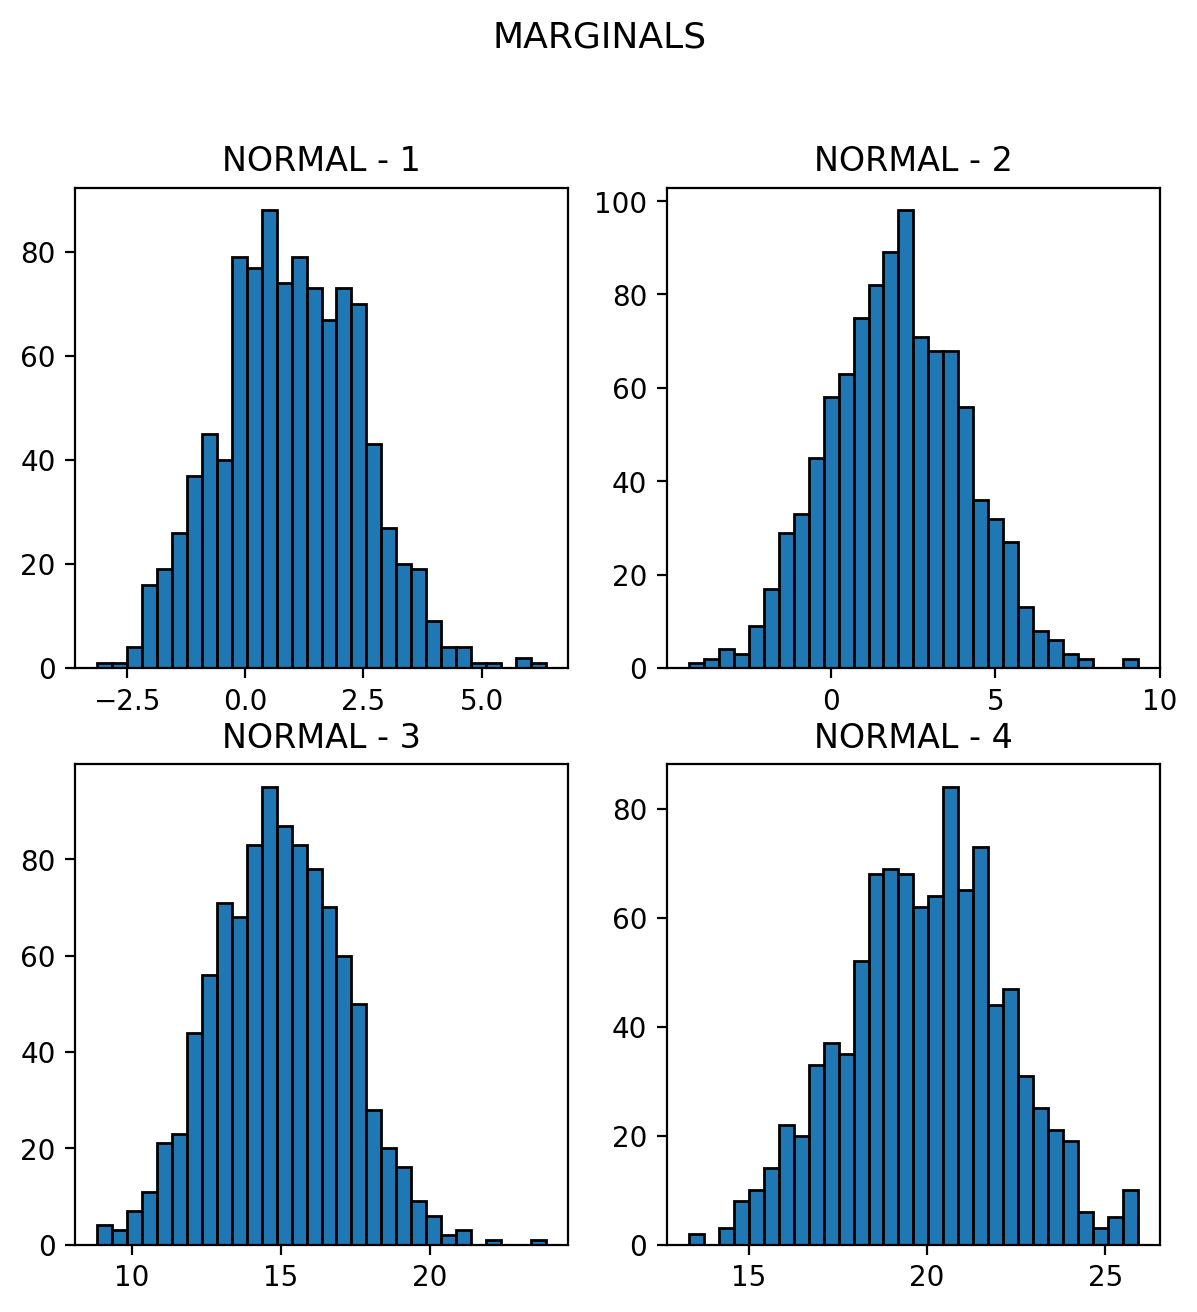

In [173]:
params = fit3.extract()
result = params['multi']
result1 = [result[i][0] for i in range(0,1000)]
result2 = [result[i][1] for i in range(0,1000)]
result3 = [result[i][2] for i in range(0,1000)]
result4 = [result[i][3] for i in range(0,1000)]
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle('MARGINALS', x= 0.5, y=1, fontsize=13)
ax1=axes[0][0]
ax1.hist(result1, bins = 30, edgecolor = black)
ax1.set_title(r'NORMAL - 1')
ax2=axes[0][1]
ax2.hist(result2, bins = 30, edgecolor = black)
ax2.set_title(r'NORMAL - 2')
ax3=axes[1][0]
ax3.hist(result3, bins = 30, edgecolor = black)
ax3.set_title(r'NORMAL - 3')
ax4=axes[1][1]
ax4.hist(result4, bins = 30, edgecolor = black)
ax4.set_title(r'NORMAL - 4')
plt.show()